# <center>Prediction of Heart disease


**Heart diesease dataset description**
* age : age of a person in years
* sex :Gender of a person(0 is female, 1 is male)
* cp : Type of chest pain 

  Value 0: asymptomatic

  Value 1: atypical angina

  Value 2: non-anginal pain

  Value 3: typical angina
* trestbps : resting blood pressure (in mm Hg)
* chol : cholestoral in mg/dl
* fbs : fast blood sugar (1 = true; 0 = false)
* restecg : resting electrocardiographic results
* thalach : maximum heart rate achieved
* exang : exercise induced angina (1 = yes; 0 = no)
* oldpeak : ST depression induced by exercise relative to rest
* slope : the slope of the peak exercise ST segment
* ca : number of major vessels (0-3) colored by flourosopy
* thal 

Value 0: NULL (dropped from the dataset previously)

Value 1: fixed defect (no blood flow in some part of the heart)

Value 2: normal blood flow

Value 3: reversible defect (a blood flow is observed but it is not normal)
* target


**Import the libraries required**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score
sns.set_theme(style="darkgrid")
%matplotlib inline

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

**Read the heart disease dataset into pandas dataframe**

In [ ]:
df_heart=pd.read_csv('/content/heart.csv')

Observe the datasets

In [ ]:
# to get first 5 rows 
df_heart.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
df_heart.shape

(1025, 14)

**The dataset contains 14 features including target and 1025 observations.**

In [ ]:
df_heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

**The dataset contains no null values**

In [ ]:
df_heart.duplicated().sum()

723

**There are 723 duplicates in the dataset. Hence dropping the duplicates.**

In [ ]:
df_heart.drop_duplicates(inplace=True)

In [ ]:
df_heart.duplicated().sum()

0

In [ ]:
df_heart.shape

(302, 14)

**After dropping the dataset contains 14 features and 302 records.**

In [ ]:
df_heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**Data analysis**

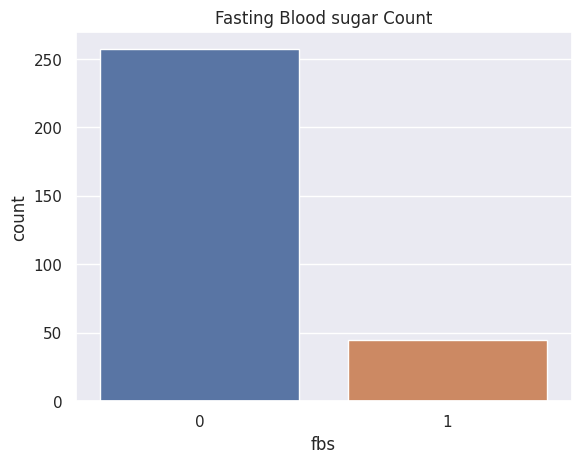

In [ ]:
# count of fasting blood sugar
plt.title("Fasting Blood sugar Count")
sns.countplot(data=df_heart, x='fbs')
plt.show()

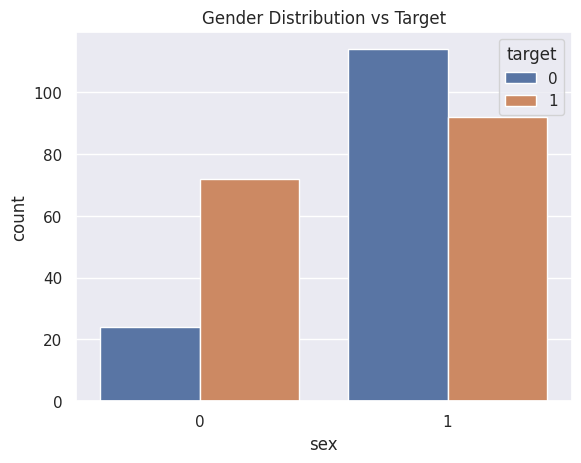

In [ ]:
# distribution of gender
plt.title("Gender Distribution vs Target")
sns.countplot(data=df_heart, x='sex', hue='target')
plt.show()

Text(0.5, 1.0, 'Chest Pain Type vs target')

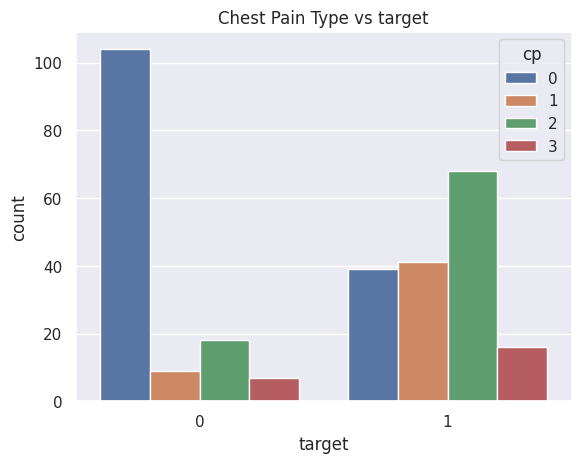

In [ ]:
sns.countplot(data= df_heart, x='target',hue='cp')
plt.title('Chest Pain Type vs target')

Text(0.5, 1.0, 'Slope vs Target')

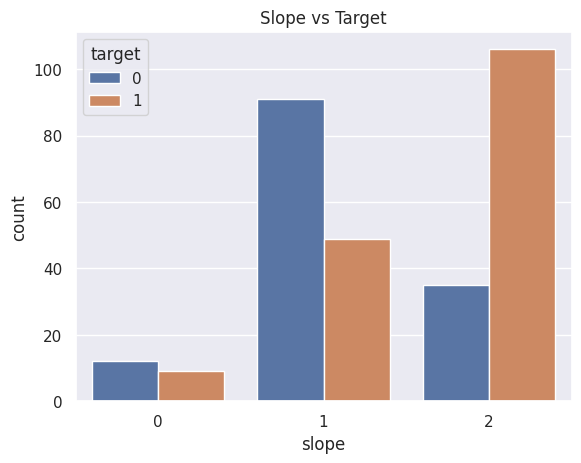

In [ ]:
sns.countplot(data= df_heart, x='slope',hue='target')
plt.title('Slope vs Target')

In [ ]:
import warnings

warnings.simplefilter('ignore')

Text(0.5, 1.0, 'Age of Heart Diseased Patients')

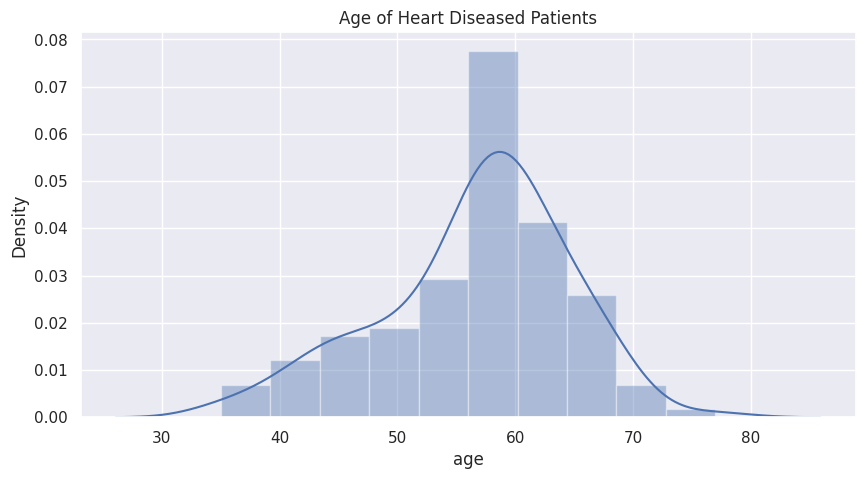

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(df_heart[df_heart['target']==0]['age'],bins=10)
plt.title('Age of Heart Diseased Patients')

Text(0.5, 1.0, 'Chol of Heart Diseased Patients')

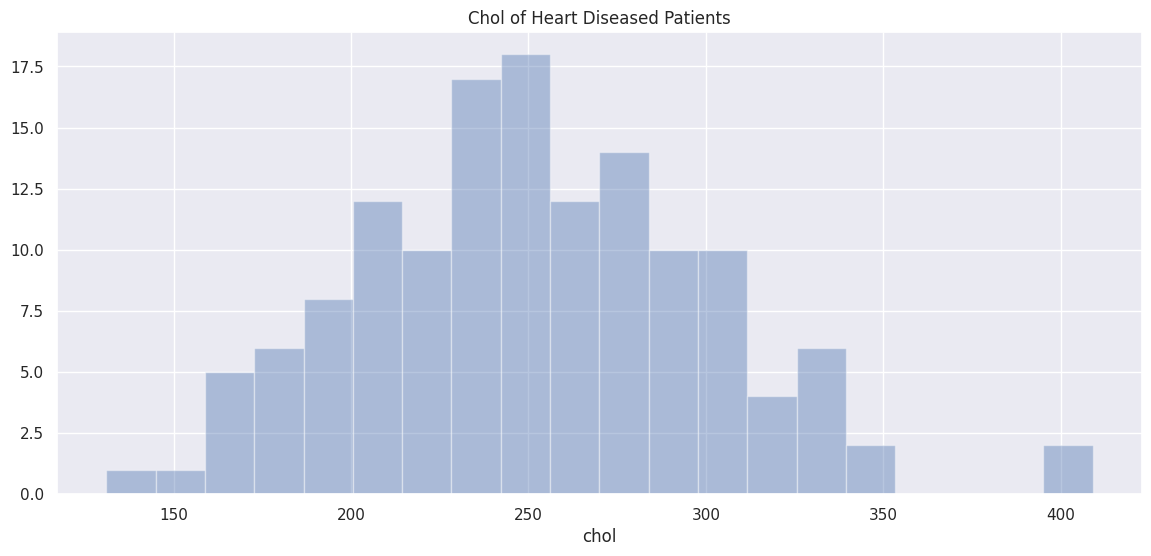

In [ ]:
plt.figure(figsize=(14,6))
sns.distplot(df_heart[df_heart['target']==0]['chol'],kde=False,bins=20)
plt.title('Chol of Heart Diseased Patients')

Text(0.5, 1.0, 'thalach of Heart Diseased Patients')

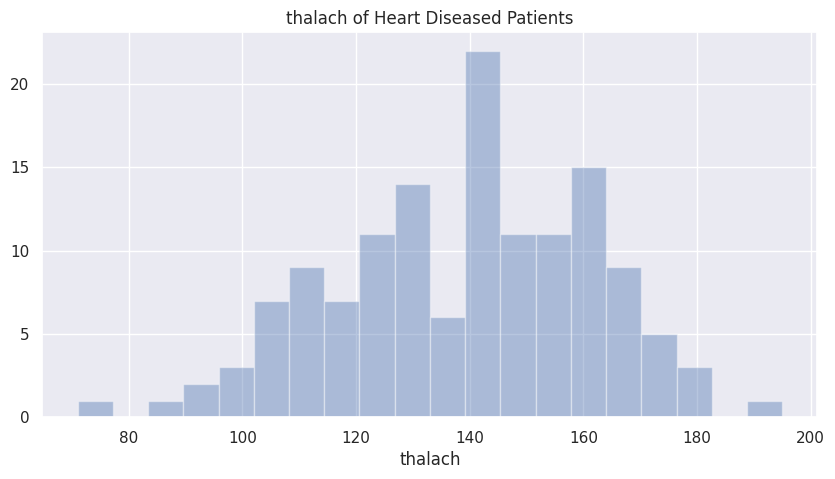

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(df_heart[df_heart['target']==0]['thalach'],kde=False,bins=20)
plt.title('thalach of Heart Diseased Patients')

In [ ]:
df_heart['target'].value_counts()

1    164
0    138
Name: target, dtype: int64

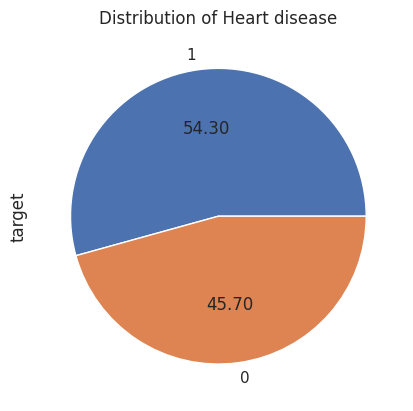

In [ ]:
df_heart['target'].value_counts().plot(kind="pie", autopct='%.2f')
plt.title('Distribution of Heart disease')
plt.show()


**Feature Selection**

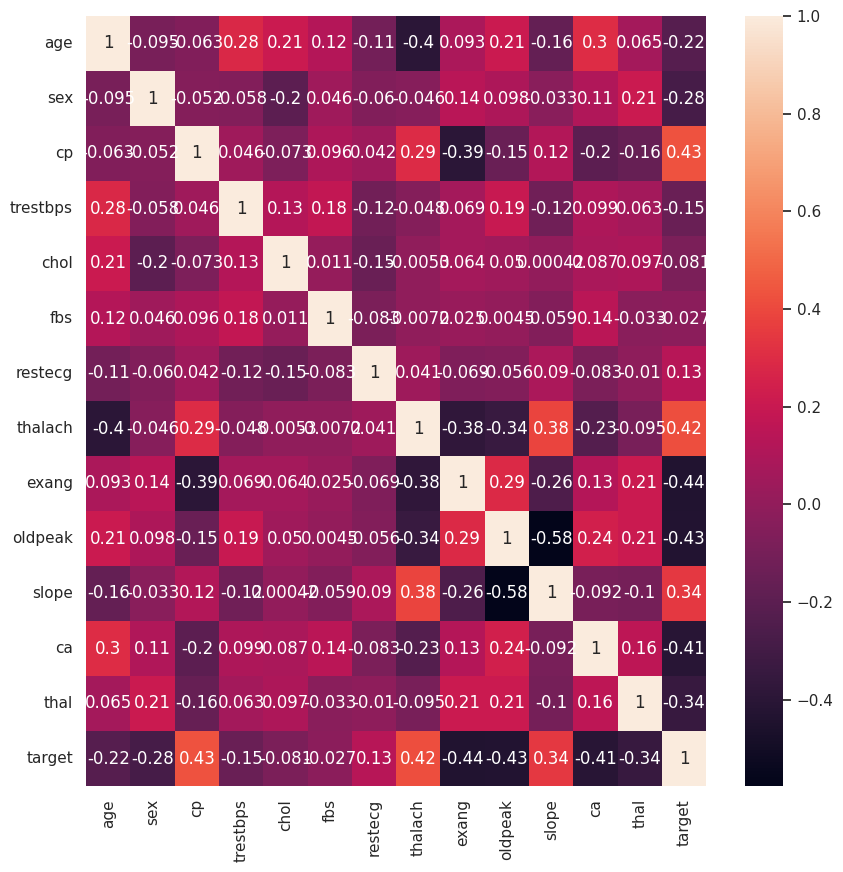

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = df_heart.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot = True)
plt.show()

From the above correlation matrix visualization, no two independent features are highly correlated.

In [ ]:
corr = abs(df_heart.corr()['target'])
corr[corr>0.3]

cp         0.432080
thalach    0.419955
exang      0.435601
oldpeak    0.429146
slope      0.343940
ca         0.408992
thal       0.343101
target     1.000000
Name: target, dtype: float64

From the above, alpha value is taken as 0.3 and features with above 0.3 correlation with target variable are selected for building the model.

All other features are dropped.

In [ ]:
Weak_correlated_features = ['sex','age','trestbps','chol','fbs']
df_heart.drop(Weak_correlated_features,axis=1,inplace=True)

**Model Design**

x = dataset with independent variables
y = dataset with target variable

In [ ]:
x = df_heart.drop(labels='target',axis=1).values
y=df_heart['target'].values

The independent and dependent datasets are divided into training and testing datasets in the 90 : 10 split ratio.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)
from collections import Counter
print(Counter(y_train))


Counter({1: 145, 0: 126})


The training dataset is imbalanced with 145 heart disease cases and 126 no heart disease observations.

If the training dataset is imbalanced, the model will be biased to majority class.

**Over Sampling using SMOTE function**

**Oversampling method is used to balance the training data.**

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix


**Logistic regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

Logistmodel = LogisticRegression()
Logistmodel.fit(x_train_smote,y_train_smote)


LogisticRegression()

In [ ]:
predlogist = Logistmodel.predict(x_test)
print(predlogist)

[1 1 0 1 1 0 1 1 1 0 0 1 0 1 1 0 0 1 1 0 1 1 1 1 0 0 1 1 0 1 0]


In [ ]:
print('Classification report')
print(classification_report(y_test,predlogist))
print('********')

print('Accuracy with Logistic Regression: ',(accuracy_score(y_test,predlogist))*100)

Classification report
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        12
           1       0.89      0.89      0.89        19

    accuracy                           0.87        31
   macro avg       0.86      0.86      0.86        31
weighted avg       0.87      0.87      0.87        31

********
Accuracy with Logistic Regression:  87.09677419354838


In [ ]:
from sklearn.ensemble import BaggingClassifier
Bag_model = BaggingClassifier(LogisticRegression(), n_estimators=50,
    bootstrap=True,  random_state=101)
Bag_model.fit(x_train_smote,y_train_smote)


BaggingClassifier(estimator=LogisticRegression(), n_estimators=50,
                  random_state=101)

In [ ]:
bag_predictions = Bag_model.predict(x_test)
print(bag_predictions)

[1 1 0 1 1 0 1 1 1 0 0 1 0 1 1 0 0 1 1 0 1 1 1 1 0 0 1 1 0 1 0]


In [ ]:
print('Classification report')
print(classification_report(y_test,bag_predictions))
print('********')

print('Accuracy with Logistic Regression: ',(accuracy_score(y_test,bag_predictions))*100)


Classification report
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        12
           1       0.89      0.89      0.89        19

    accuracy                           0.87        31
   macro avg       0.86      0.86      0.86        31
weighted avg       0.87      0.87      0.87        31

********
Accuracy with Logistic Regression:  87.09677419354838


**K Nearest Neighbors algorithm**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier()
KNN_model.fit(x_train_smote,y_train_smote)

KNeighborsClassifier()

In [ ]:
y_predknn = KNN_model.predict(x_test)
y_predknn

array([1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1])

In [ ]:
print('Classification report')
print(classification_report(y_test,y_predknn))
print('********')

print('Accuracy with KNN: ',(accuracy_score(y_test,y_predknn))*100)

Classification report
              precision    recall  f1-score   support

           0       0.82      0.75      0.78        12
           1       0.85      0.89      0.87        19

    accuracy                           0.84        31
   macro avg       0.83      0.82      0.83        31
weighted avg       0.84      0.84      0.84        31

********
Accuracy with KNN:  83.87096774193549


**SVM**

In [ ]:
from sklearn.svm import SVC
SVM_model = SVC()
SVM_model.fit(x_train_smote,y_train_smote)
Y_SVM = SVM_model.predict(x_test)
print('Classification report')
print(classification_report(y_test,Y_SVM))
print('********')
print('Accuracy with SVC: ',(accuracy_score(y_test,Y_SVM))*100)

Classification report
              precision    recall  f1-score   support

           0       0.71      0.83      0.77        12
           1       0.88      0.79      0.83        19

    accuracy                           0.81        31
   macro avg       0.80      0.81      0.80        31
weighted avg       0.82      0.81      0.81        31

********
Accuracy with SVC:  80.64516129032258


**Tuning hyperparameters of Logistic regression**

In [ ]:
Logistmodel.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
from sklearn.model_selection import GridSearchCV

**Listing the values in parameter grid**

In [ ]:
param_grid = [    
    {'penalty' : ['l2','l1'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],
    }
]

**Tuning hyperparameters using Gridsearch CV method**

In [ ]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(LogisticRegression(), param_grid = param_grid, cv = 2, verbose=True, n_jobs=-1)
best_clf = clf.fit(x_train_smote,y_train_smote)


Fitting 2 folds for each of 200 candidates, totalling 400 fits


In [ ]:
best_clf.best_estimator_

LogisticRegression(C=0.03359818286283781, solver='liblinear')

**Fitting the model with obtained best values of hyperparameters**

In [ ]:

Tuned_logist=LogisticRegression(C=0.03359818286283781, solver='liblinear')
Tuned_logist.fit(x_train_smote,y_train_smote)


LogisticRegression(C=0.03359818286283781, solver='liblinear')

In [ ]:
pred_tunedlog = Tuned_logist.predict(x_test)
print(pred_tunedlog)

[1 1 0 1 1 0 1 1 1 0 0 1 0 1 1 0 0 1 1 0 1 1 1 1 0 0 1 1 0 1 1]


In [ ]:
print('Classification report')
print(classification_report(y_test,pred_tunedlog))
print('********')

print('Accuracy with Logistic Regression: ',(accuracy_score(y_test,pred_tunedlog))*100)

Classification report
              precision    recall  f1-score   support

           0       0.91      0.83      0.87        12
           1       0.90      0.95      0.92        19

    accuracy                           0.90        31
   macro avg       0.90      0.89      0.90        31
weighted avg       0.90      0.90      0.90        31

********
Accuracy with Logistic Regression:  90.32258064516128


<Axes: >

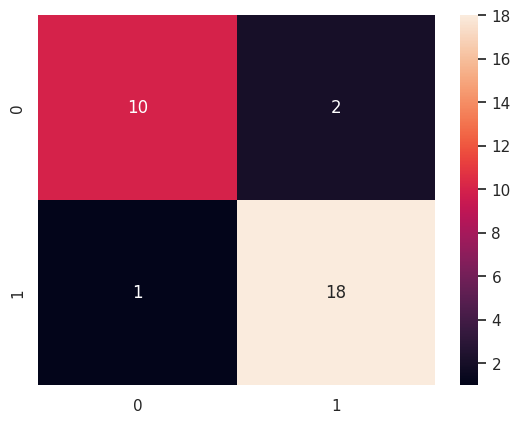

In [ ]:
cf_matrix = confusion_matrix(y_test,pred_tunedlog)
sns.heatmap(cf_matrix, annot=True)

**ROC CURVE**

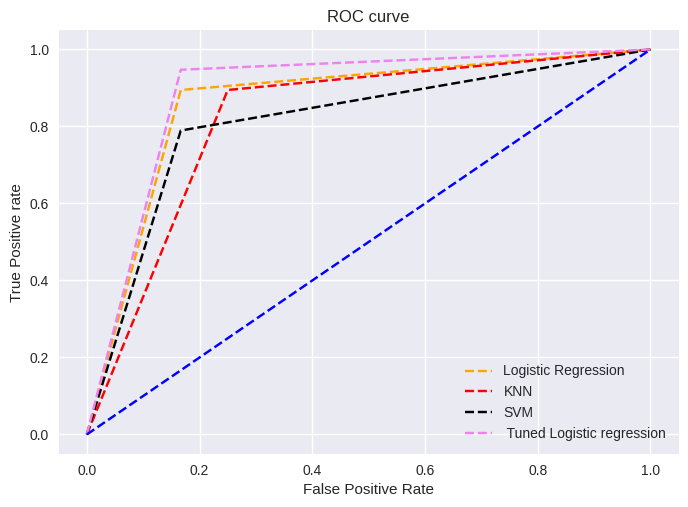

In [ ]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, predlogist, pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, y_predknn, pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, Y_SVM, pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_test, pred_tunedlog, pos_label=1)


# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr3, tpr3, linestyle='--',color='Red', label='KNN')
plt.plot(fpr4, tpr4, linestyle='--',color='Black', label='SVM')
plt.plot(fpr5, tpr5, linestyle='--',color='Violet', label=' Tuned Logistic regression')



plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();